In [1]:
import csv
import os
import cv2
import random
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import skimage.io as io
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
from skimage.filters import gaussian
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
def readTrafficSigns(rootpath, IMG_SIZE):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training' and image size
    Returns:   trainingdata'''
    training_data = []

    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        k = 0
        # loop over all images in current annotations file
        for row in gtReader:
            if k == 0:
                pass
            else:
                training_data.append([cv2.resize(plt.imread(prefix + row[0]), (IMG_SIZE,IMG_SIZE)),int(row[7])])
            k += 1
        gtFile.close()
    return training_data

In [3]:
IMG_SIZE = 50
training_data = readTrafficSigns('./Final_Training/Images', IMG_SIZE)
random.shuffle(training_data)
training_data

[[array([[[157, 181, 230],
          [161, 183, 231],
          [155, 181, 228],
          ...,
          [149, 178, 223],
          [152, 177, 222],
          [155, 178, 223]],
  
         [[157, 180, 227],
          [159, 182, 230],
          [160, 181, 229],
          ...,
          [150, 179, 220],
          [153, 180, 223],
          [153, 179, 227]],
  
         [[159, 183, 225],
          [160, 185, 229],
          [159, 184, 230],
          ...,
          [157, 182, 225],
          [154, 180, 224],
          [153, 177, 225]],
  
         ...,
  
         [[ 58,  52,  51],
          [ 66,  64,  50],
          [ 91,  97, 118],
          ...,
          [134, 138, 162],
          [161, 168, 192],
          [133, 159, 174]],
  
         [[ 38,  37,  31],
          [ 78,  67,  62],
          [116, 105, 105],
          ...,
          [ 79, 103, 125],
          [ 95, 102, 124],
          [101, 117, 137]],
  
         [[ 40,  43,  45],
          [ 66,  57,  61],
          [ 97,  92,  92

In [6]:
len(training_data)
#training_data[0]
df = pd.DataFrame(data=training_data, index=None, columns=None)
df

,0,1
0,"[[[51, 59, 45], [61, 70, 54], [76, 86, 69], [8...",9
1,"[[[117, 156, 201], [109, 149, 191], [95, 136, ...",17
2,"[[[48, 54, 45], [44, 52, 43], [41, 51, 42], [4...",15
3,"[[[18, 18, 22], [18, 18, 21], [17, 17, 21], [1...",7
4,"[[[27, 26, 30], [27, 26, 29], [27, 26, 29], [2...",11
...,...,...
39204,"[[[64, 47, 42], [60, 46, 40], [60, 47, 41], [6...",35
39205,"[[[70, 83, 116], [76, 87, 122], [91, 99, 127],...",35
39206,"[[[71, 61, 54], [70, 61, 54], [70, 64, 56], [7...",24
39207,"[[[27, 27, 31], [28, 28, 34], [29, 31, 38], [3...",2


(39209, 50, 50, 3)
39209


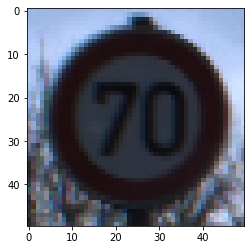

In [4]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.reshape(X, (-1, IMG_SIZE, IMG_SIZE, 3))
X = X/255

example = X[0]

print(X.shape)
print(len(y))
plt.imshow(example)

Rotated Image


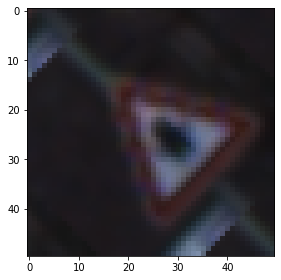

In [7]:
#rotate 
print('Rotated Image')
#rotating the image by 45 degrees
rotated = rotate(example, angle=45, mode = 'wrap')
#plot the rotated image
io.imshow(rotated)

Shifted Image


Text(0.5, 1.0, 'Wrap Shift')

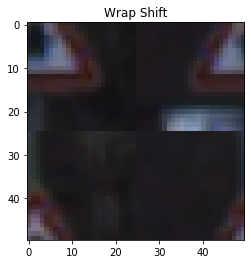

In [8]:
#shifting
print('Shifted Image')
transform = AffineTransform(translation=(25,25))
wrapShift = warp(example,transform,mode='wrap')
plt.imshow(wrapShift)
plt.title('Wrap Shift')

Flipped left-to-right Image


Text(0.5, 1.0, 'Left to Right Flipped')

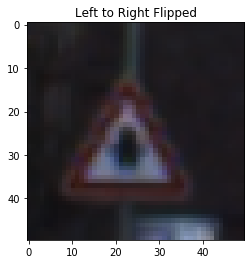

In [9]:
#flip image left-to-right
print('Flipped left-to-right Image')
flipLR = np.fliplr(example)
plt.imshow(flipLR)
plt.title('Left to Right Flipped')

Flipped up-to-down Image


Text(0.5, 1.0, 'Up Down Flipped')

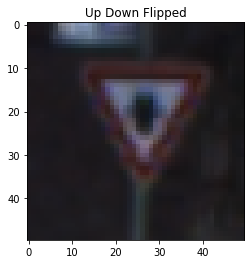

In [10]:
#flip image up-to-down
print('Flipped up-to-down Image')
flipUD = np.flipud(example)
plt.imshow(flipUD)
plt.title('Up Down Flipped')

Noisy Image


Text(0.5, 1.0, 'Random Noise')

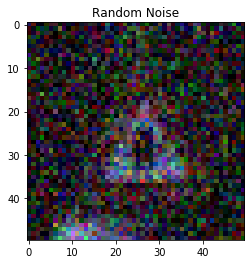

In [11]:
#adding noise
print('Noisy Image')
#standard deviation for noise to be added in the image
sigma=0.155
#add random noise to the image
noisyRandom = random_noise(example,var=sigma**2)
plt.imshow(noisyRandom)
plt.title('Random Noise')

Blurred Image


Text(0.5, 1.0, 'Blurred Image')

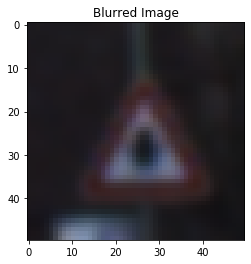

In [12]:
#blurring
print('Blurred Image')
blurred = gaussian(example,sigma=1,multichannel=True)
plt.imshow(blurred)
plt.title('Blurred Image')

In [5]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

y = to_categorical(y)

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.3, random_state = 13)


Using TensorFlow backend.


# Augmenting

In [6]:
#from torchsummary import summary
import pandas as pd
import numpy as np
from skimage.io import imread, imsave
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from skimage.transform import rotate
from skimage.util import random_noise
from skimage.filters import gaussian
from scipy import ndimage

In [7]:
final_train_data = []
final_target_train = []

for i in tqdm(range(train_X.shape[0])):
    final_train_data.append(train_X[i])
    final_train_data.append(rotate(train_X[i], angle=45, mode = 'wrap'))
    final_train_data.append(np.fliplr(train_X[i]))
    final_train_data.append(np.flipud(train_X[i]))
    final_train_data.append(random_noise(train_X[i],var=0.2**2))

    for j in range(5):
        final_target_train.append(train_y[i])

100%|██████████| 27446/27446 [01:17<00:00, 353.68it/s]


In [8]:
print(len(final_target_train))
print(len(final_train_data))
final_train = np.array(final_train_data)
final_target_train = np.array(final_target_train)

137230
137230


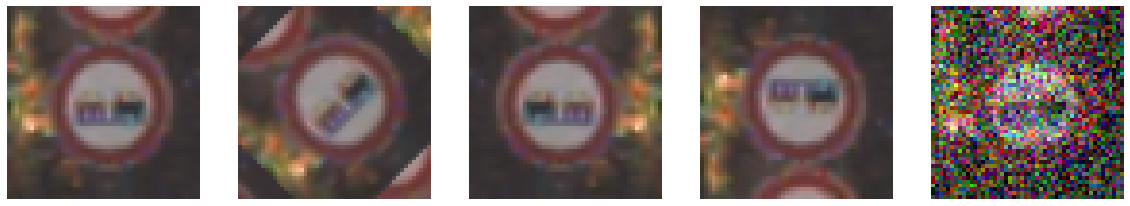

In [12]:
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(final_train[i+30])
    ax[i].axis('off')

In [9]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Conv2D, Flatten, MaxPooling2D, Input
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split

import time
import keras
from keras.models import Sequential

In [10]:


inputs = Input(shape=(50,50, 3))

x = Conv2D(16, (3,3), padding="same", activation='relu')(inputs)
#x = MaxPooling2D(pool_size=(2,2))(x)
block_1_output = Dropout(0)(x)


x = Conv2D(64, (3,3), padding="same", activation='relu')(block_1_output)
x = MaxPooling2D(pool_size=(2,2))(x)
block_2_output = Dropout(0)(x)

x = Conv2D(128, (3,3), padding="same", activation='relu')(block_2_output)
x = MaxPooling2D(pool_size=(2,2))(x)
block_3_output = Dropout(0)(x)

#x = Conv2D(128, (3,3), padding="same", activation='relu')(block_3_output)
#x = MaxPooling2D(pool_size=(2,2))(x)
#block_4_output = Dropout(0)(x)

x = Flatten()(block_3_output)
x = Dense(256, activation='relu')(x)

prediction = Dense(43, activation='softmax')(x)

model_1 = Model(inputs=inputs, outputs=prediction)

In [11]:
model_1.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [13]:
model_1.fit(train_X, train_y, batch_size=128, epochs=30, validation_data=(val_X,val_y))#, callbacks=[tensorboard])

Train on 27446 samples, validate on 11763 samples
Epoch 1/30
27446/27446 [==============================] - 494s 18ms/step - loss: 1.3230 - accuracy: 0.6477 - val_loss: 0.5513 - val_accuracy: 0.8649
Epoch 2/30
27446/27446 [==============================] - 407s 15ms/step - loss: 0.1561 - accuracy: 0.9583 - val_loss: 0.1218 - val_accuracy: 0.9657
Epoch 3/30
27446/27446 [==============================] - 543s 20ms/step - loss: 0.0477 - accuracy: 0.9874 - val_loss: 0.0497 - val_accuracy: 0.9887
Epoch 4/30
27446/27446 [==============================] - 397s 14ms/step - loss: 0.0235 - accuracy: 0.9938 - val_loss: 0.0339 - val_accuracy: 0.9925
Epoch 5/30
27446/27446 [==============================] - 414s 15ms/step - loss: 0.0149 - accuracy: 0.9960 - val_loss: 0.0866 - val_accuracy: 0.9769
Epoch 6/30
27446/27446 [==============================] - 431s 16ms/step - loss: 0.0121 - accuracy: 0.9974 - val_loss: 0.0494 - val_accuracy: 0.9895
Epoch 7/30
27446/27446 [==============================] 

Train on 27446 samples, validate on 11763 samples
Epoch 1/20
27446/27446 [==============================] - 1213s 44ms/step - loss: 1.5303 - accuracy: 0.5825 - val_loss: 0.8988 - val_accuracy: 0.7462
Epoch 2/20
27446/27446 [==============================] - 423s 15ms/step - loss: 0.2093 - accuracy: 0.9439 - val_loss: 0.2429 - val_accuracy: 0.9271
Epoch 3/20
27446/27446 [==============================] - 407s 15ms/step - loss: 0.0665 - accuracy: 0.9818 - val_loss: 0.0914 - val_accuracy: 0.9758
Epoch 4/20
27446/27446 [==============================] - 389s 14ms/step - loss: 0.0305 - accuracy: 0.9912 - val_loss: 0.0616 - val_accuracy: 0.9864
Epoch 5/20
27446/27446 [==============================] - 374s 14ms/step - loss: 0.0201 - accuracy: 0.9947 - val_loss: 0.0485 - val_accuracy: 0.9922
Epoch 6/20
27446/27446 [==============================] - 368s 13ms/step - loss: 0.0210 - accuracy: 0.9954 - val_loss: 0.0857 - val_accuracy: 0.9840
Epoch 7/20
27446/27446 [==============================]

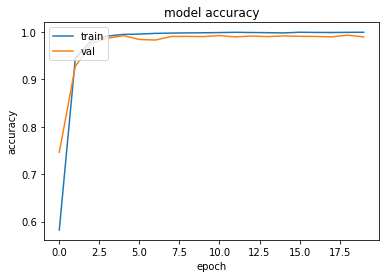

In [12]:
from matplotlib import pyplot as plt

history = model_1.fit(train_X, train_y, batch_size=128, epochs=20, validation_data=(val_X,val_y))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

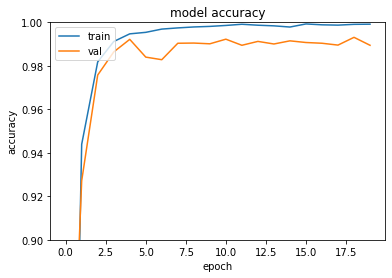

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim(0.9,1.0)
plt.show()

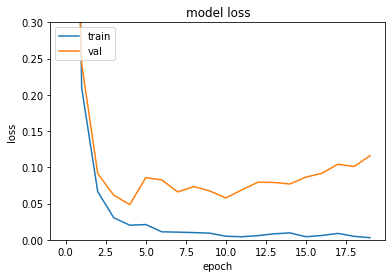

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim(0,0.3)
plt.show()